In [1]:
import numpy as np
import json
import os
import pandas as pd
from matplotlib import pyplot as plt
import sys
from scipy import stats, io
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn import metrics


BIDS_path= "C:\\Users\\ICN_admin\\Dropbox (Brain Modulation Lab)\\Shared Lab Folders\\CRCNS\\MOVEMENT DATA\\"
subjects = ['000', '001', '004', '005', '006', '007', '008', '009', '010', '013', '014']


In [2]:
df_all = pd.read_csv("df_all_LM.csv", index_col=0)
df_best_ECOG_CON = pd.read_csv("df_ECOG_CON_LM.csv", index_col=0)
df_best_ECOG_IPS = pd.read_csv("df_ECOG_IPS_LM.csv", index_col=0)
df_best_STN_CON = pd.read_csv("df_STN_CON_LM.csv", index_col=0)
df_best_STN_IPS = pd.read_csv("df_STN_IPS_LM.csv", index_col=0)

### beta peak

In [3]:
# mean of con. and ips. best ch. 
df_here_ECOG = df_best_ECOG_CON
df_here_ECOG["r2"] = np.mean(np.concatenate((np.arctanh(np.expand_dims(df_best_ECOG_CON["r2_con"], axis=1)), \
                np.arctanh(np.expand_dims(df_best_ECOG_IPS["r2_ips"], axis=1))), axis=1), axis=1)
model = smf.ols("r2~b_peak", data=df_here_ECOG)
results = model.fit()
print(results.summary())

rho_ECOG = np.round(stats.spearmanr(df_here_ECOG["r2"], df_here_ECOG["b_peak"])[0], 2)
p_val_ECOG = np.round(results.pvalues["b_peak"],3)

df_here_STN = df_best_STN_CON
df_here_STN["r2"] = np.mean(np.concatenate((np.arctanh(np.expand_dims(df_best_STN_CON["r2_con"], axis=1)), \
                np.arctanh(np.expand_dims(df_best_STN_IPS["r2_ips"], axis=1))), axis=1), axis=1)
model = smf.ols("r2~b_peak", data=df_here_STN)
results = model.fit()
print(results.summary())

rho_STN = np.round(stats.spearmanr(df_here_STN["r2"], df_here_STN["b_peak"])[0], 2)
p_val_STN = np.round(results.pvalues["b_peak"],3)


                            OLS Regression Results                            
Dep. Variable:                     r2   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     2.090
Date:                Fri, 04 Sep 2020   Prob (F-statistic):              0.170
Time:                        10:27:25   Log-Likelihood:                 19.640
No. Observations:                  16   AIC:                            -35.28
Df Residuals:                      14   BIC:                            -33.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0568      0.057      1.001      0.3

C:\Users\ICN_admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


Text(0.5, 1.0, 'ECOG $\\rho$=0.4 p=0.17\nSTN $\\rho$=0.57 p=0.139\nSum of Beta Peaks No Movement periodic fit\n $R^2$: Mean of Con. and Ips. best performances')

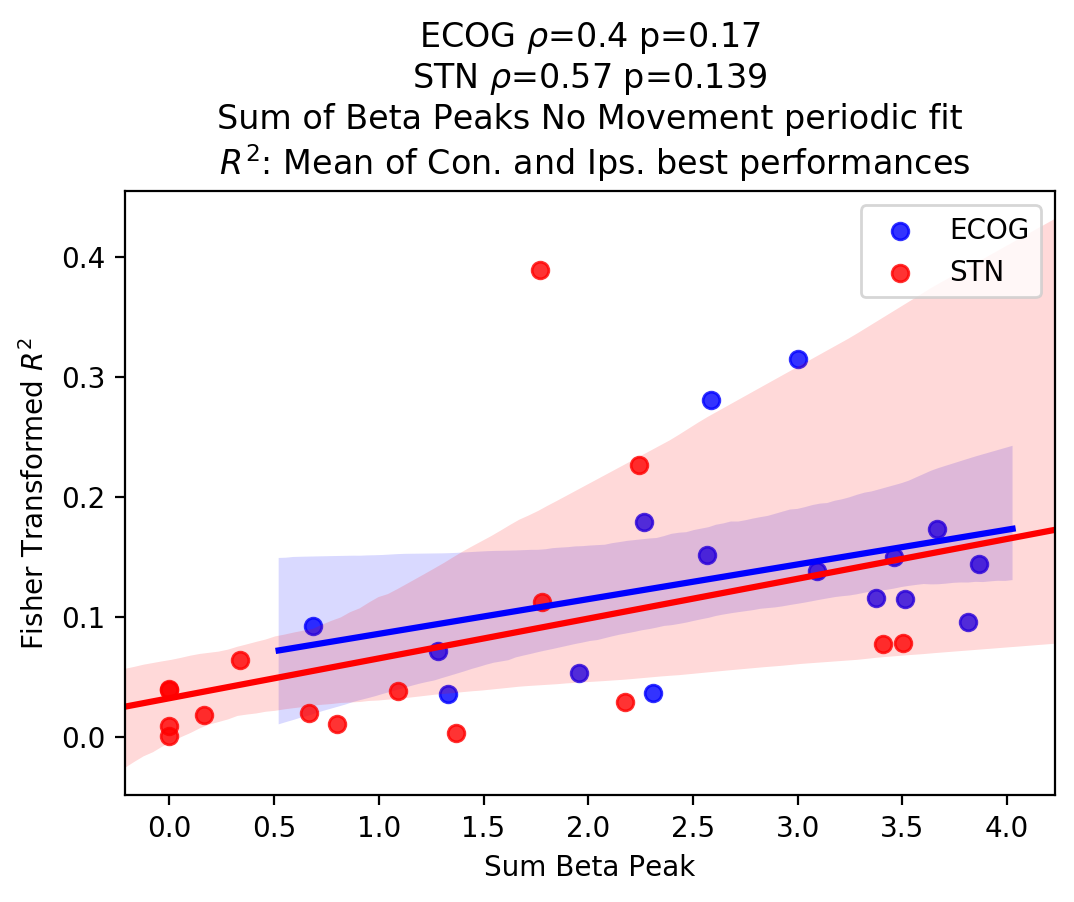

In [4]:
plt.figure(figsize=(6,4), dpi=200)
sns.regplot(x="b_peak", y="r2", data=df_here_ECOG, color="blue", label="ECOG")
sns.regplot(x="b_peak", y="r2", data=df_here_STN, color="red", label="STN")
plt.legend()
plt.xlabel("Sum Beta Peak")
plt.ylabel("Fisher Transformed "+r"$R^2$")
plt.title("ECOG "+ r"$\rho$"+"="+str(rho_ECOG)+" p="+str(p_val_ECOG)+\
          "\nSTN "+ r"$\rho$"+"="+str(rho_STN)+" p="+str(p_val_STN)+\
          "\nSum of Beta Peaks No Movement periodic fit\n "+\
          r"$R^2$"+": Mean of Con. and Ips. best performances")

### distance 

### best ch. 

In [5]:
# mean of con. and ips. best ch. 
df_here = df_best_ECOG_CON
df_here["r2Z"] =np.arctanh(df_best_ECOG_CON["r2_con"])
model = smf.ols("r2Z~dist_con", data=df_here)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    r2Z   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.066
Method:                 Least Squares   F-statistic:                   0.07305
Date:                Fri, 04 Sep 2020   Prob (F-statistic):              0.791
Time:                        10:28:00   Log-Likelihood:                 10.316
No. Observations:                  16   AIC:                            -16.63
Df Residuals:                      14   BIC:                            -15.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1697      0.063      2.695      0.0


### Mean ch. 

In [6]:
df_here = df_all[df_all["loc"].str.contains("ECOG")]
per_ = []
pred_ = []
pred_var = "dist_con"
for sub in subjects:
    sub_ = int(sub)
    per_.append(np.arctanh(df_here[df_here["sub"] == sub_]["r2_con"]).mean())
    pred_.append(df_here[df_here["sub"] == sub_][pred_var].mean())
    #pred_.append(np.concatenate((df_here[df_here["sub"] == sub_]["UPDRS_rigidity_upper_extrimity_contralateral"], 
    #                           df_here[df_here["sub"] == sub_]["UPDRS_rigidity_upper_extrimity_ipsilateral"])).mean()) 
df_comp = pd.DataFrame()
df_comp["r2"] = np.array(per_)
df_comp["pred"] = pred_

model = smf.ols("r2~pred", data=df_comp)
results = model.fit()
print(stats.spearmanr(df_comp["r2"], df_comp["pred"]))
print(results.summary())

SpearmanrResult(correlation=0.018181818181818184, pvalue=0.9576852410216187)
                            OLS Regression Results                            
Dep. Variable:                     r2   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                 -0.050
Method:                 Least Squares   F-statistic:                    0.5246
Date:                Fri, 04 Sep 2020   Prob (F-statistic):              0.487
Time:                        10:28:07   Log-Likelihood:                 9.9722
No. Observations:                  11   AIC:                            -15.94
Df Residuals:                       9   BIC:                            -15.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

C:\Users\ICN_admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


### was hier nur hilft ist das Mixed LM


### ECOG 

In [9]:
df_here = df_all[df_all["loc"].str.contains("ECOG")]

df_here["r2_conZ"] = np.arctanh(df_all["r2_con"])
df_here["r2_ipsZ"] = np.arctanh(df_all["r2_ips"])

md = smf.mixedlm("r2_conZ ~ dist_con", data=df_here, groups=df_here["sub"])
mdf_con = md.fit()
summary_con = mdf_con.summary()
print("con")
print(sum_)

md = smf.mixedlm("r2_ipsZ ~ dist_ips", data=df_here, groups=df_here["sub"])
mdf_ips = md.fit()
summary_ips = mdf_ips.summary()
print("ips")
print(sum_)

con


C:\Users\ICN_admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ICN_admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


NameError: name 'sum_' is not defined

### STN

In [10]:
df_here_STN = df_all[df_all["loc"].str.contains("STN")]

df_here_STN["r2_conZ"] = np.arctanh(df_all["r2_con"])
df_here_STN["r2_ipsZ"] = np.arctanh(df_all["r2_ips"])

md = smf.mixedlm("r2_conZ ~ dist_con", data=df_here_STN, groups=df_here_STN["sub"])
mdf_con = md.fit()
summary_con = mdf_con.summary()
print("con")
print(summary_con)

md = smf.mixedlm("r2_ipsZ ~ dist_ips", data=df_here_STN, groups=df_here_STN["sub"])
mdf_ips = md.fit()
summary_ips = mdf_ips.summary()
print("ips")
print(summary_ips)

con
        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: r2_conZ 
No. Observations: 96      Method:             REML    
No. Groups:       11      Scale:              0.0013  
Min. group size:  6       Likelihood:         148.1459
Max. group size:  12      Converged:          Yes     
Mean group size:  8.7                                 
------------------------------------------------------
            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------
Intercept    0.104    0.045  2.292 0.022  0.015  0.193
dist_con    -0.010    0.003 -3.228 0.001 -0.016 -0.004
Group Var    0.021    0.277                           

ips
        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: r2_ipsZ 
No. Observations: 96      Method:             REML    
No. Groups:       11      Scale:              0.0019  
Min. group size:  6       Likelihood:         150.4211
Max. group size:  1

C:\Users\ICN_admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ICN_admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\ICN_admin\Anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2094: ConvergenceWarning: The MLE may be on the boundary of the para

In [11]:
summary_con.tables[1].iloc[1]["P>|z|"]

'0.001'

In [12]:
summary_ips.tables[1].iloc[1]["P>|z|"]

'0.077'

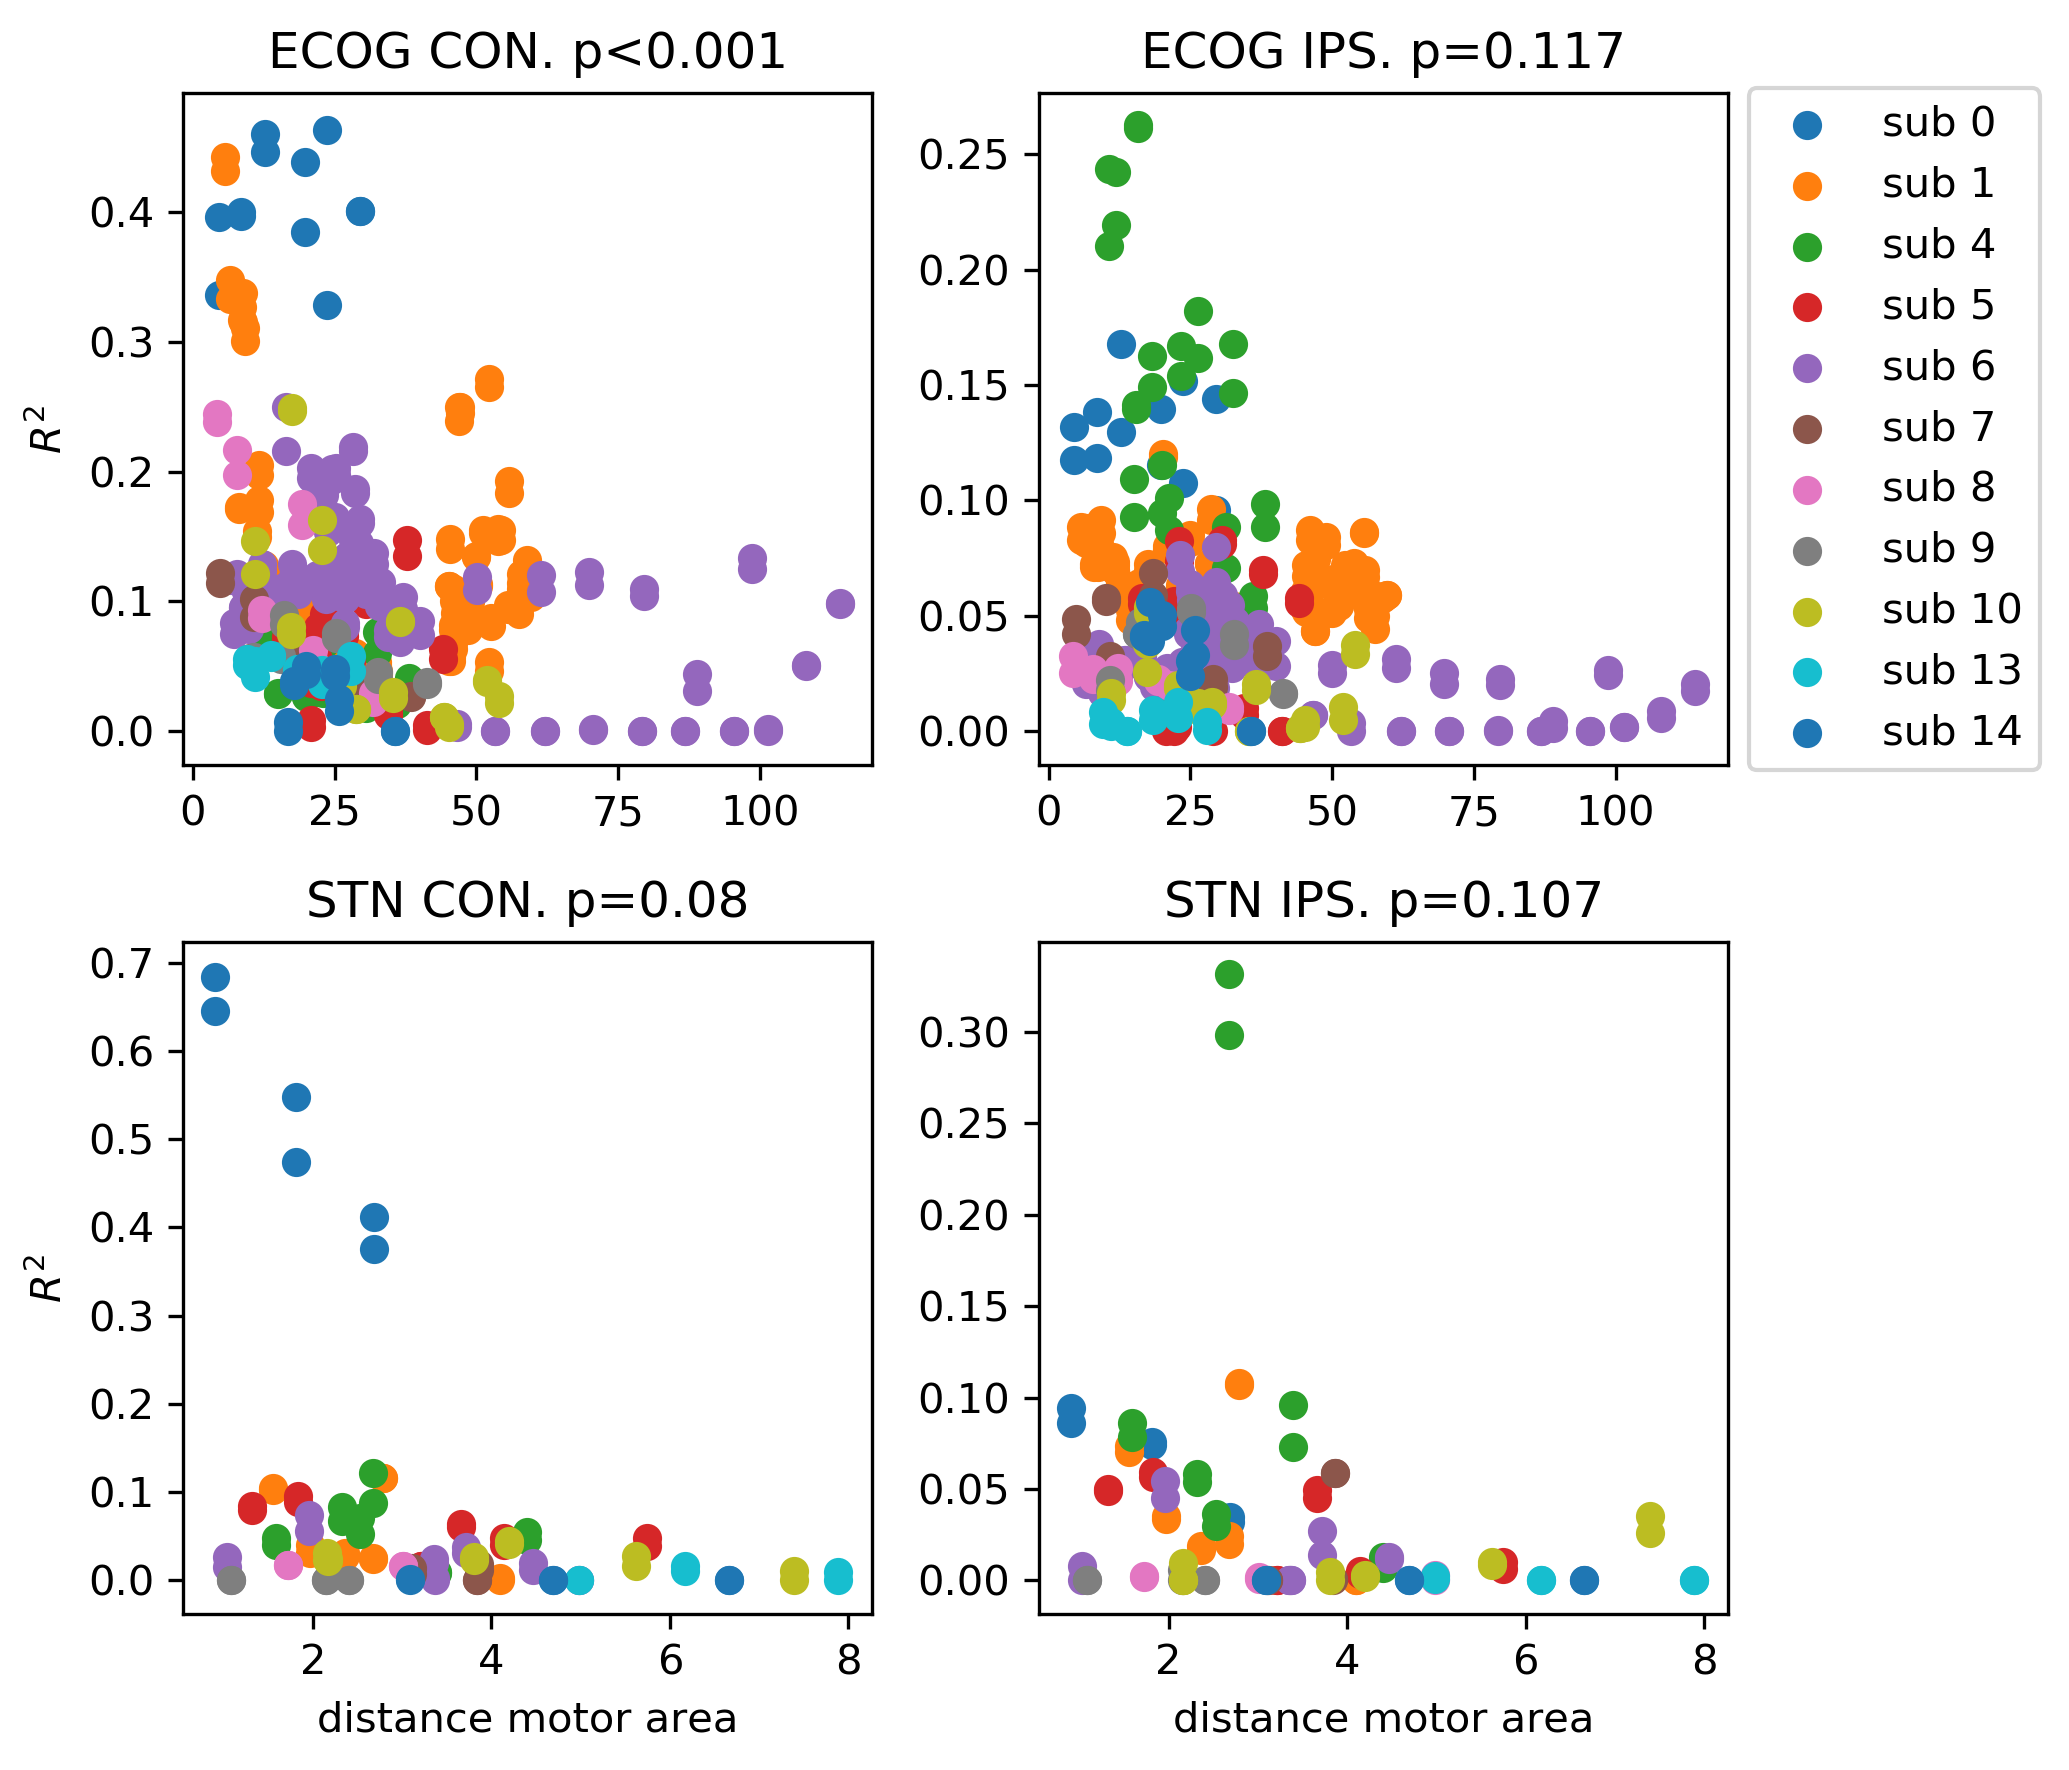

In [13]:
plt.figure(figsize=(7,6), dpi=300)
plt.subplot(221)
for sub in df_here["sub"].unique():
    df_ = df_here[df_here["sub"] == sub]
    plt.scatter(df_["dist_con"], df_["r2_conZ"], label="sub "+str(sub))
plt.ylabel(r"$R^2$")
plt.title("ECOG CON. p<0.001")
plt.subplot(222)
for sub in df_here["sub"].unique():
    df_ = df_here[df_here["sub"] == sub]
    plt.scatter(df_["dist_ips"], df_["r2_ipsZ"], label="sub "+str(sub))
plt.title("ECOG IPS. p=0.117")
leg = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.subplot(223)
for sub in df_here_STN["sub"].unique():
    df_ = df_here_STN[df_here_STN["sub"] == sub]
    plt.scatter(df_["dist_con"], df_["r2_conZ"], label="sub "+str(sub))
plt.ylabel(r"$R^2$")
plt.title("STN CON. p=0.08")
plt.xlabel("distance motor area")
plt.subplot(224)
for sub in df_here_STN["sub"].unique():
    df_ = df_here_STN[df_here_STN["sub"] == sub]
    plt.scatter(df_["dist_ips"], df_["r2_ipsZ"], label="sub "+str(sub))
plt.title("STN IPS. p=0.107")
plt.xlabel("distance motor area")

plt.tight_layout()
plt.show()


### UPDRS scores 

In [62]:
# first lateralized scores

UPDRS_rigidity_upper_extrimity_contralateral
UPDRS_rigidity_upper_extrimity_ipsilateral

UPDRS_combined_akinesia_rigidty_contalateral
UPDRS_combined_akinesia_rigidty_ipsilateral

UPDRS_total

### best ch 

In [15]:
df_here = df_best_ECOG_CON
df_here["r2_Z"] = np.arctanh(df_best_ECOG_CON["r2_con"])
model = smf.ols("r2_Z~UPDRS_rigidity_upper_extrimity_contralateral", data=df_here)
results = model.fit()
print(stats.spearmanr(df_here["r2_Z"], df_here["UPDRS_rigidity_upper_extrimity_contralateral"]))

print(results.summary())

SpearmanrResult(correlation=-0.15434872662825794, pvalue=0.5681680431036599)
                            OLS Regression Results                            
Dep. Variable:                   r2_Z   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.6992
Date:                Fri, 04 Sep 2020   Prob (F-statistic):              0.417
Time:                        10:29:07   Log-Likelihood:                 10.665
No. Observations:                  16   AIC:                            -17.33
Df Residuals:                      14   BIC:                            -15.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [16]:
df_here = df_best_ECOG_CON
df_here["r2_Z"] = np.arctanh(df_best_ECOG_CON["r2_con"])
model = smf.ols("r2_Z~UPDRS_combined_akinesia_rigidty_contalateral", data=df_here)
results = model.fit()
print(stats.spearmanr(df_here["r2_Z"], df_here["UPDRS_combined_akinesia_rigidty_contalateral"]))

print(results.summary())

SpearmanrResult(correlation=-0.17738596608300927, pvalue=0.5110324936806414)
                            OLS Regression Results                            
Dep. Variable:                   r2_Z   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.203
Date:                Fri, 04 Sep 2020   Prob (F-statistic):              0.291
Time:                        10:29:11   Log-Likelihood:                 10.934
No. Observations:                  16   AIC:                            -17.87
Df Residuals:                      14   BIC:                            -16.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------

### mean ch. 

In [17]:
df_here = df_all[df_all["loc"].str.contains("ECOG")]
per_ = []
pred_ = []
pred_var = "UPDRS_rigidity_upper_extrimity_contralateral"
for sub in subjects:
    sub_ = int(sub)
    per_.append(np.arctanh(df_here[df_here["sub"] == sub_]["r2_con"]).mean())
    pred_.append(df_here[df_here["sub"] == sub_][pred_var].mean())
    #pred_.append(np.concatenate((df_here[df_here["sub"] == sub_]["UPDRS_rigidity_upper_extrimity_contralateral"], 
    #                           df_here[df_here["sub"] == sub_]["UPDRS_rigidity_upper_extrimity_ipsilateral"])).mean()) 
df_comp = pd.DataFrame()
df_comp["r2"] = np.array(per_)
df_comp["pred"] = pred_

model = smf.ols("r2~pred", data=df_comp)
results = model.fit()
print(stats.spearmanr(df_comp["r2"], df_comp["pred"]))
print(results.summary())

SpearmanrResult(correlation=-0.15244486419593908, pvalue=0.6545330193206453)
                            OLS Regression Results                            
Dep. Variable:                     r2   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     2.462
Date:                Fri, 04 Sep 2020   Prob (F-statistic):              0.151
Time:                        10:29:15   Log-Likelihood:                 10.990
No. Observations:                  11   AIC:                            -17.98
Df Residuals:                       9   BIC:                            -17.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [18]:
df_here = df_all[df_all["loc"].str.contains("ECOG")]
per_ = []
pred_ = []
pred_var = "UPDRS_rigidity_upper_extrimity_ipsilateral"
for sub in subjects:
    sub_ = int(sub)
    per_.append(np.arctanh(df_here[df_here["sub"] == sub_]["r2_con"]).mean())
    pred_.append(df_here[df_here["sub"] == sub_][pred_var].mean())
    #pred_.append(np.concatenate((df_here[df_here["sub"] == sub_]["UPDRS_rigidity_upper_extrimity_contralateral"], 
    #                           df_here[df_here["sub"] == sub_]["UPDRS_rigidity_upper_extrimity_ipsilateral"])).mean()) 
df_comp = pd.DataFrame()
df_comp["r2"] = np.array(per_)
df_comp["pred"] = pred_

model = smf.ols("r2~pred", data=df_comp)
results = model.fit()
print(stats.spearmanr(df_comp["r2"], df_comp["pred"]))
print(results.summary())

SpearmanrResult(correlation=-0.28675656655163845, pvalue=0.39258421906770846)
                            OLS Regression Results                            
Dep. Variable:                     r2   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     3.146
Date:                Fri, 04 Sep 2020   Prob (F-statistic):              0.110
Time:                        10:29:17   Log-Likelihood:                 11.309
No. Observations:                  11   AIC:                            -18.62
Df Residuals:                       9   BIC:                            -17.82
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

In [19]:
df_here = df_all[df_all["loc"].str.contains("ECOG")]
per_ = []
pred_ = []
pred_var = "UPDRS_combined_akinesia_rigidty_contalateral"
for sub in subjects:
    sub_ = int(sub)
    per_.append(np.arctanh(df_here[df_here["sub"] == sub_]["r2_con"]).mean())
    pred_.append(df_here[df_here["sub"] == sub_][pred_var].mean())
    #pred_.append(np.concatenate((df_here[df_here["sub"] == sub_]["UPDRS_rigidity_upper_extrimity_contralateral"], 
    #                           df_here[df_here["sub"] == sub_]["UPDRS_rigidity_upper_extrimity_ipsilateral"])).mean()) 
df_comp = pd.DataFrame()
df_comp["r2"] = np.array(per_)
df_comp["pred"] = pred_

model = smf.ols("r2~pred", data=df_comp)
results = model.fit()
print(stats.spearmanr(df_comp["r2"], df_comp["pred"]))
print(results.summary())

SpearmanrResult(correlation=-0.11495012246792573, pvalue=0.7364570399913342)
                            OLS Regression Results                            
Dep. Variable:                     r2   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     1.376
Date:                Fri, 04 Sep 2020   Prob (F-statistic):              0.271
Time:                        10:29:22   Log-Likelihood:                 10.443
No. Observations:                  11   AIC:                            -16.89
Df Residuals:                       9   BIC:                            -16.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

### seems like UPDRS tot / combination of both needs to be best

In [20]:
# ECOG
df_here_ECOG = df_best_ECOG_CON
df_here_ECOG["r2_Z"] = (np.arctanh(df_best_ECOG_CON["r2_con"]) + np.arctanh(df_best_ECOG_IPS["r2_ips"]))/2
model = smf.ols("r2_Z~UPDRS_total", data=df_here_ECOG)
results = model.fit()
print(stats.spearmanr(df_here_ECOG["r2_Z"], df_here_ECOG["UPDRS_total"]))

print(results.summary())

SpearmanrResult(correlation=-0.35799443292543287, pvalue=0.17336946102976072)
                            OLS Regression Results                            
Dep. Variable:                   r2_Z   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     2.243
Date:                Fri, 04 Sep 2020   Prob (F-statistic):              0.156
Time:                        10:29:27   Log-Likelihood:                 19.715
No. Observations:                  16   AIC:                            -35.43
Df Residuals:                      14   BIC:                            -33.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

In [21]:
# STN
df_here_STN = df_best_STN_CON
df_here_STN["r2_Z"] = (np.arctanh(df_best_STN_CON["r2_con"]) + np.arctanh(df_best_STN_IPS["r2_ips"]))/2
model = smf.ols("r2_Z~UPDRS_total", data=df_here_STN)
results = model.fit()
print(stats.spearmanr(df_here_STN["r2_Z"], df_here_STN["UPDRS_total"]))

print(results.summary())

SpearmanrResult(correlation=-0.3284081161547359, pvalue=0.21428222219207166)
                            OLS Regression Results                            
Dep. Variable:                   r2_Z   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     2.764
Date:                Fri, 04 Sep 2020   Prob (F-statistic):              0.119
Time:                        10:29:29   Log-Likelihood:                 15.855
No. Observations:                  16   AIC:                            -27.71
Df Residuals:                      14   BIC:                            -26.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

Text(0.5, 1.0, 'ECOG: $\\rho$=-0.36 p=0.16 STN: $\\rho$=-0.33 p=0.16\nUPDRS total \n $R^2$: Mean of Con. and Ips. best performances ')

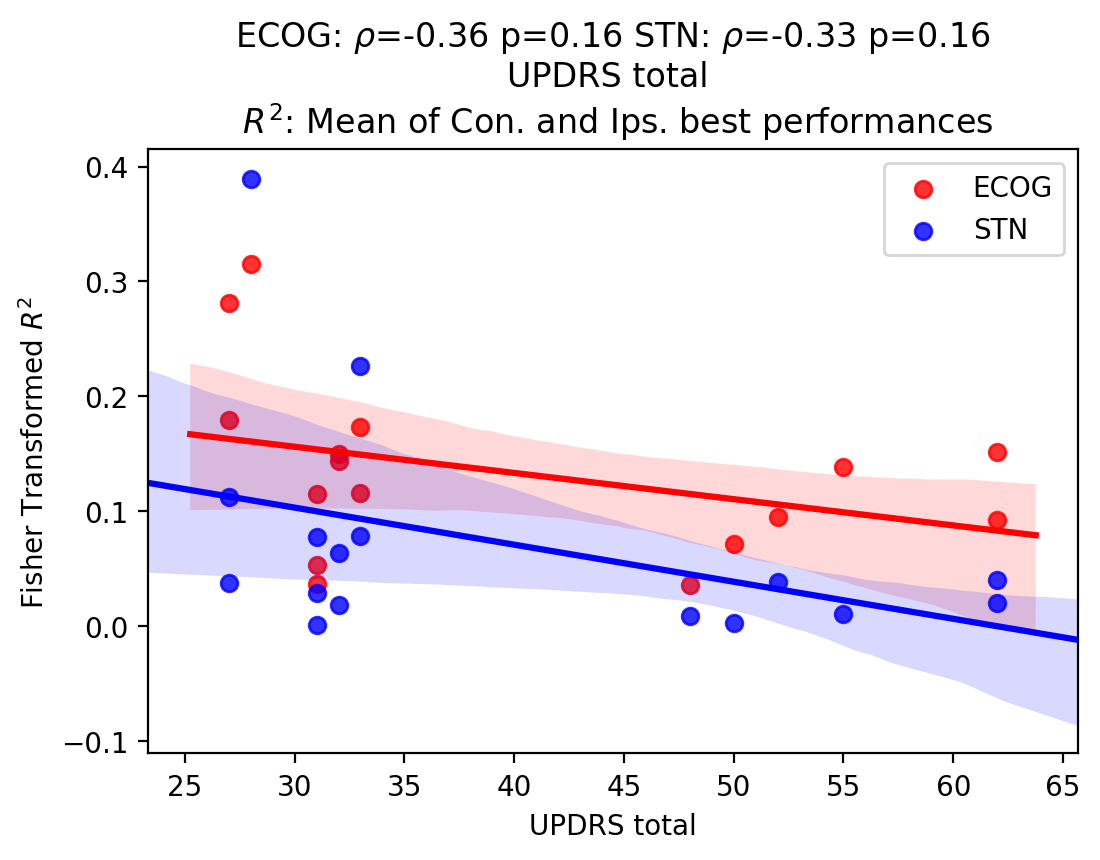

In [24]:
plt.figure(figsize=(6,4), dpi=200)
sns.regplot(x="UPDRS_total", y="r2_Z", data=df_here_ECOG, color="red", label="ECOG")
sns.regplot(x="UPDRS_total", y="r2_Z", data=df_here_STN, color="blue", label="STN")
plt.legend()
plt.xlabel("UPDRS total")
plt.ylabel("Fisher Transformed " + r"$R^2$")
plt.title("ECOG: "r"$\rho$"+"=-0.36 p=0.16"+" STN: "r"$\rho$"+"=-0.33 p=0.16"\
          "\nUPDRS total \n "+\
          r"$R^2$"+": Mean of Con. and Ips. best performances ")

### MEAN comparison UPDRS

In [25]:
# ECOG
df_here = df_all[df_all["loc"].str.contains("ECOG")]
per_ = []
pred_ = []
pred_var = "UPDRS_total"
for sub in subjects:
    sub_ = int(sub)
    per_.append(np.arctanh(np.concatenate((df_here[df_here["sub"] == sub_]["r2_con"], \
                               df_here[df_here["sub"] == sub_]["r2_ips"]))).mean())
    pred_.append(df_here[df_here["sub"] == sub_][pred_var].mean())
    #pred_.append(np.concatenate((df_here[df_here["sub"] == sub_]["UPDRS_rigidity_upper_extrimity_contralateral"], 
    #                           df_here[df_here["sub"] == sub_]["UPDRS_rigidity_upper_extrimity_ipsilateral"])).mean()) 
df_comp_ECOG = pd.DataFrame()
df_comp_ECOG["r2"] = np.array(per_)
df_comp_ECOG["pred"] = pred_

model = smf.ols("r2~pred", data=df_comp_ECOG)
results = model.fit()
print(stats.spearmanr(df_comp_ECOG["r2"], df_comp_ECOG["pred"]))
print(results.summary())

SpearmanrResult(correlation=-0.36446563806256416, pvalue=0.2704637103697426)
                            OLS Regression Results                            
Dep. Variable:                     r2   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     1.998
Date:                Fri, 04 Sep 2020   Prob (F-statistic):              0.191
Time:                        10:35:37   Log-Likelihood:                 15.721
No. Observations:                  11   AIC:                            -27.44
Df Residuals:                       9   BIC:                            -26.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [26]:
# STN
df_here = df_all[df_all["loc"].str.contains("STN")]
per_ = []
pred_ = []
pred_var = "UPDRS_total"
for sub in subjects:
    sub_ = int(sub)
    per_.append(np.arctanh(np.concatenate((df_here[df_here["sub"] == sub_]["r2_con"], \
                               df_here[df_here["sub"] == sub_]["r2_ips"]))).mean())
    pred_.append(df_here[df_here["sub"] == sub_][pred_var].mean())
    #pred_.append(np.concatenate((df_here[df_here["sub"] == sub_]["UPDRS_rigidity_upper_extrimity_contralateral"], 
    #                           df_here[df_here["sub"] == sub_]["UPDRS_rigidity_upper_extrimity_ipsilateral"])).mean()) 
df_comp_STN = pd.DataFrame()
df_comp_STN["r2"] = np.array(per_)
df_comp_STN["pred"] = pred_

model = smf.ols("r2~pred", data=df_comp_STN)
results = model.fit()
print(stats.spearmanr(df_comp_STN["r2"], df_comp_STN["pred"]))
print(results.summary())

SpearmanrResult(correlation=-0.4601378680539873, pvalue=0.15441839412466296)
                            OLS Regression Results                            
Dep. Variable:                     r2   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     2.465
Date:                Fri, 04 Sep 2020   Prob (F-statistic):              0.151
Time:                        10:35:38   Log-Likelihood:                 13.311
No. Observations:                  11   AIC:                            -22.62
Df Residuals:                       9   BIC:                            -21.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

Text(0.5, 1.0, 'ECOG: $\\rho$=-0.36 p=0.19 STN: $\\rho$=-0.46 p=0.15\nUPDRS total\n $R^2$: Mean of Con. and Ips. mean performances ')

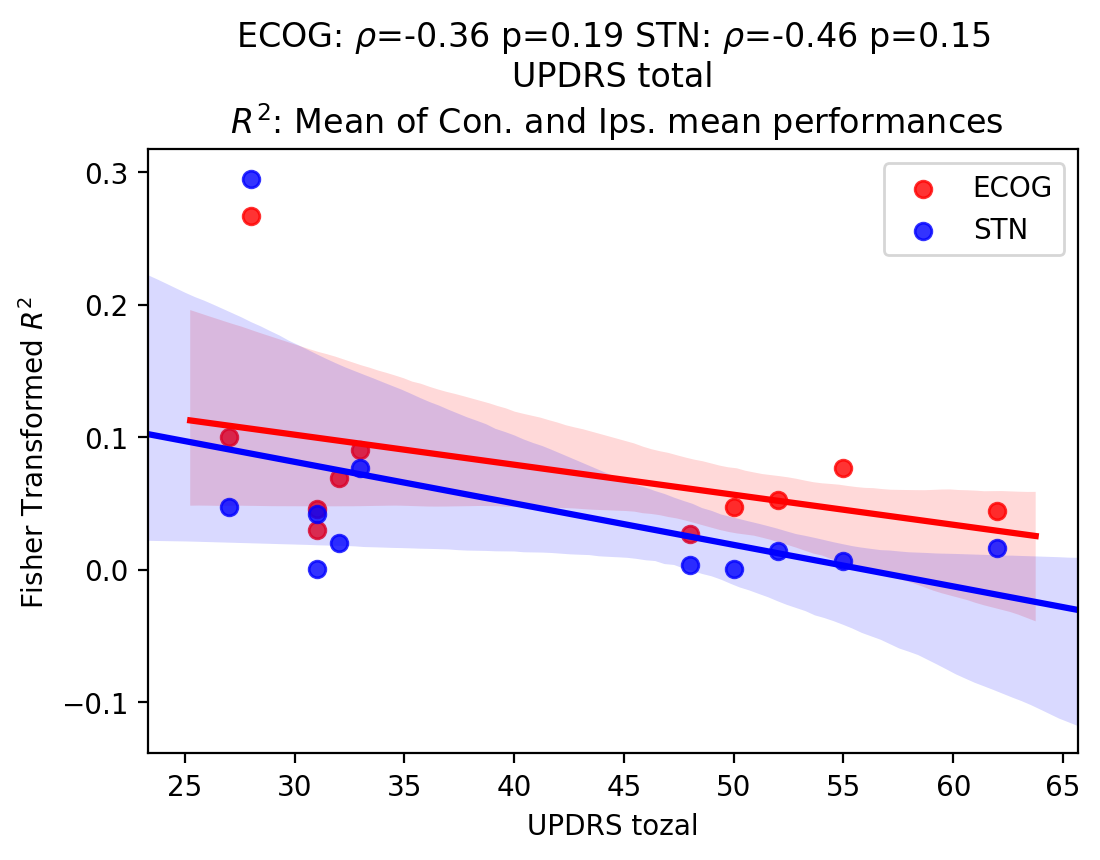

In [28]:
plt.figure(figsize=(6,4), dpi=200)
sns.regplot(x="pred", y="r2", data=df_comp_ECOG, color="red", label="ECOG")
sns.regplot(x="pred", y="r2", data=df_comp_STN, color="blue", label="STN")
plt.legend()
plt.xlabel("UPDRS tozal")
plt.ylabel("Fisher Transformed " + r"$R^2$")
plt.title("ECOG: "r"$\rho$"+"=-0.36 p=0.19"+" STN: "r"$\rho$"+"=-0.46 p=0.15"\
          "\nUPDRS total\n "+\
          r"$R^2$"+": Mean of Con. and Ips. mean performances ")

### UPDRS_combined_akinesia_rigidty_contalateral

In [29]:
df_here = df_all[df_all["loc"].str.contains("ECOG")]
per_ = []
pred_ = []
for sub in subjects:
    sub_ = int(sub)
    per_.append(np.arctanh(np.concatenate((df_here[df_here["sub"] == sub_]["r2_con"], \
                               df_here[df_here["sub"] == sub_]["r2_ips"]))).mean())
   # pred_.append(df_here[df_here["sub"] == sub_][pred_var].mean())
    pred_.append(np.concatenate((df_here[df_here["sub"] == sub_]["UPDRS_combined_akinesia_rigidty_contalateral"], 
                               df_here[df_here["sub"] == sub_]["UPDRS_combined_akinesia_rigidty_ipsilateral"])).mean()) 
    
df_comp_ECOG = pd.DataFrame()
df_comp_ECOG["r2"] = np.array(per_)
df_comp_ECOG["pred"] = pred_

model = smf.ols("r2~pred", data=df_comp_ECOG)
results = model.fit()
print(stats.spearmanr(df_comp_ECOG["r2"], df_comp_ECOG["pred"]))
print(results.summary())

SpearmanrResult(correlation=-0.26363636363636367, pvalue=0.4334407376116145)
                            OLS Regression Results                            
Dep. Variable:                     r2   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     1.513
Date:                Fri, 04 Sep 2020   Prob (F-statistic):              0.250
Time:                        10:36:43   Log-Likelihood:                 15.472
No. Observations:                  11   AIC:                            -26.94
Df Residuals:                       9   BIC:                            -26.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [31]:
df_here = df_all[df_all["loc"].str.contains("STN")]
per_ = []
pred_ = []
pred_var = "UPDRS_total"
for sub in subjects:
    sub_ = int(sub)
    per_.append(np.arctanh(np.concatenate((df_here[df_here["sub"] == sub_]["r2_con"], \
                               df_here[df_here["sub"] == sub_]["r2_ips"]))).mean())
   # pred_.append(df_here[df_here["sub"] == sub_][pred_var].mean())
    pred_.append(np.concatenate((df_here[df_here["sub"] == sub_]["UPDRS_combined_akinesia_rigidty_contalateral"], 
                               df_here[df_here["sub"] == sub_]["UPDRS_combined_akinesia_rigidty_ipsilateral"])).mean()) 
    
df_comp_STN = pd.DataFrame()
df_comp_STN["r2"] = np.array(per_)
df_comp_STN["pred"] = pred_

model = smf.ols("r2~pred", data=df_comp_STN)
results = model.fit()
print(stats.spearmanr(df_comp_STN["r2"], df_comp_STN["pred"]))
print(results.summary())



SpearmanrResult(correlation=-0.5181818181818182, pvalue=0.10249153979096383)
                            OLS Regression Results                            
Dep. Variable:                     r2   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     2.313
Date:                Fri, 04 Sep 2020   Prob (F-statistic):              0.163
Time:                        10:37:26   Log-Likelihood:                 13.238
No. Observations:                  11   AIC:                            -22.48
Df Residuals:                       9   BIC:                            -21.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

Text(0.5, 1.0, 'ECOG: $\\rho$=-0.26 p=0.25 STN: $\\rho$=-0.52 p=0.16\nUPDRS: Mean of Con. Ips. UPDRS Akineasia Rigidity \n $R^2$: Mean of Con. and Ips. mean performances ')

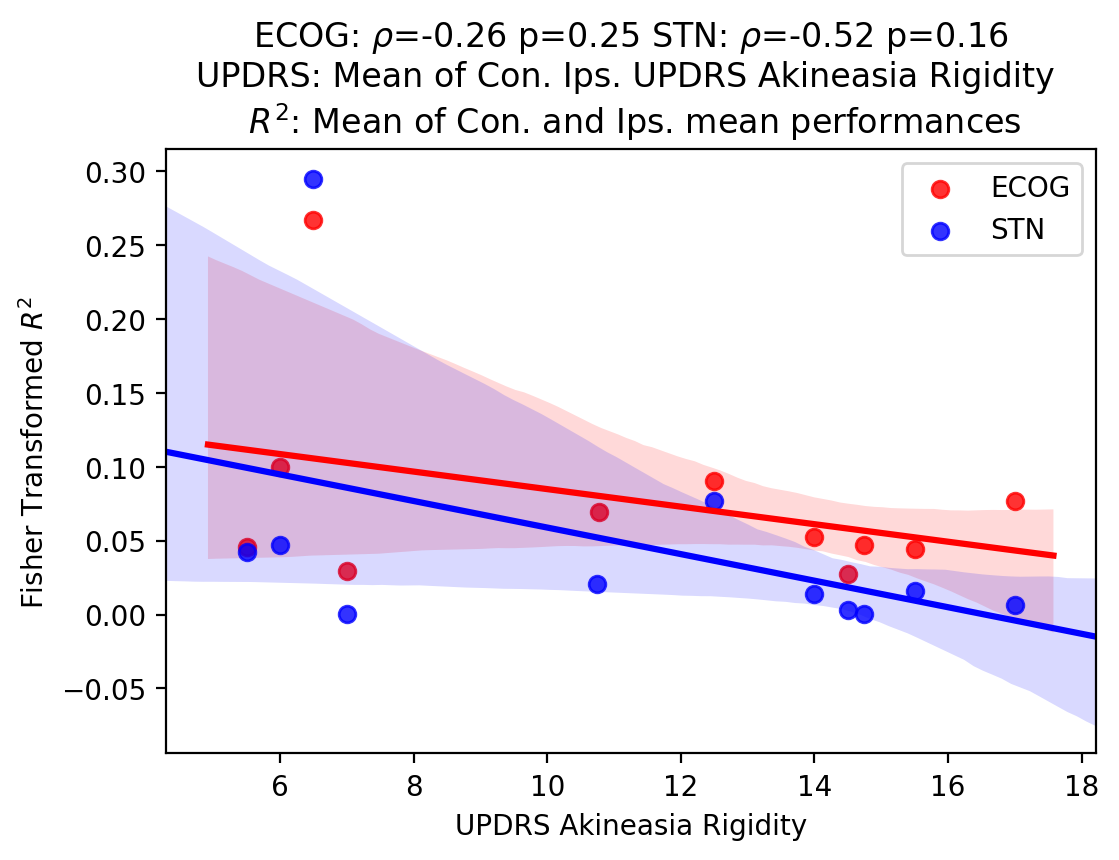

In [32]:
plt.figure(figsize=(6,4), dpi=200)
sns.regplot(x="pred", y="r2", data=df_comp_ECOG, color="red", label="ECOG")
sns.regplot(x="pred", y="r2", data=df_comp_STN, color="blue", label="STN")
plt.legend()
plt.xlabel("UPDRS Akineasia Rigidity")
plt.ylabel("Fisher Transformed " + r"$R^2$")
plt.title("ECOG: "r"$\rho$"+"=-0.26 p=0.25"+" STN: "r"$\rho$"+"=-0.52 p=0.16"\
          "\nUPDRS: Mean of Con. Ips. UPDRS Akineasia Rigidity \n "+\
          r"$R^2$"+": Mean of Con. and Ips. mean performances ")

# 

### stat. sign, 

In [33]:
df_here = df_all[df_all["loc"].str.contains("ECOG")]
per_ = []
pred_ = []
for sub in subjects:
    sub_ = int(sub)
    per_.append(np.arctanh(np.concatenate((df_here[df_here["sub"] == sub_]["r2_con"], \
                               df_here[df_here["sub"] == sub_]["r2_ips"]))).mean())
   # pred_.append(df_here[df_here["sub"] == sub_][pred_var].mean())
    pred_.append(np.concatenate((df_here[df_here["sub"] == sub_]["UPDRS_rigidity_upper_extrimity_contralateral"], 
                               df_here[df_here["sub"] == sub_]["UPDRS_rigidity_upper_extrimity_ipsilateral"])).mean()) 
    
df_comp_ECOG = pd.DataFrame()
df_comp_ECOG["r2"] = np.array(per_)
df_comp_ECOG["pred"] = pred_

model = smf.ols("r2~pred", data=df_comp_ECOG)
results = model.fit()
print(stats.spearmanr(df_comp_ECOG["r2"], df_comp_ECOG["pred"]))
print(results.summary())

SpearmanrResult(correlation=-0.4055558216516248, pvalue=0.21590678438503771)
                            OLS Regression Results                            
Dep. Variable:                     r2   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     5.818
Date:                Fri, 04 Sep 2020   Prob (F-statistic):             0.0391
Time:                        10:38:07   Log-Likelihood:                 17.360
No. Observations:                  11   AIC:                            -30.72
Df Residuals:                       9   BIC:                            -29.92
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [34]:
df_here = df_all[df_all["loc"].str.contains("STN")]
per_ = []
pred_ = []
pred_var = "UPDRS_total"
for sub in subjects:
    sub_ = int(sub)
    per_.append(np.arctanh(np.concatenate((df_here[df_here["sub"] == sub_]["r2_con"], \
                               df_here[df_here["sub"] == sub_]["r2_ips"]))).mean())
   # pred_.append(df_here[df_here["sub"] == sub_][pred_var].mean())
    pred_.append(np.concatenate((df_here[df_here["sub"] == sub_]["UPDRS_rigidity_upper_extrimity_contralateral"], 
                               df_here[df_here["sub"] == sub_]["UPDRS_rigidity_upper_extrimity_ipsilateral"])).mean()) 
    
df_comp_STN = pd.DataFrame()
df_comp_STN["r2"] = np.array(per_)
df_comp_STN["pred"] = pred_

model = smf.ols("r2~pred", data=df_comp_STN)
results = model.fit()
print(stats.spearmanr(df_comp_STN["r2"], df_comp_STN["pred"]))
print(results.summary())



SpearmanrResult(correlation=-0.5552252320230577, pvalue=0.07621583273484281)
                            OLS Regression Results                            
Dep. Variable:                     r2   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     7.840
Date:                Fri, 04 Sep 2020   Prob (F-statistic):             0.0207
Time:                        10:38:07   Log-Likelihood:                 15.425
No. Observations:                  11   AIC:                            -26.85
Df Residuals:                       9   BIC:                            -26.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

Text(0.5, 1.0, 'ECOG: $\\rho$=-0.4 p=0.039 STN: $\\rho$=-0.55 p=0.021\nUPDRS: Mean of Con. Ips. UPDRS Upper Rigidity \n $R^2$: Mean of Con. and Ips. mean performances ')

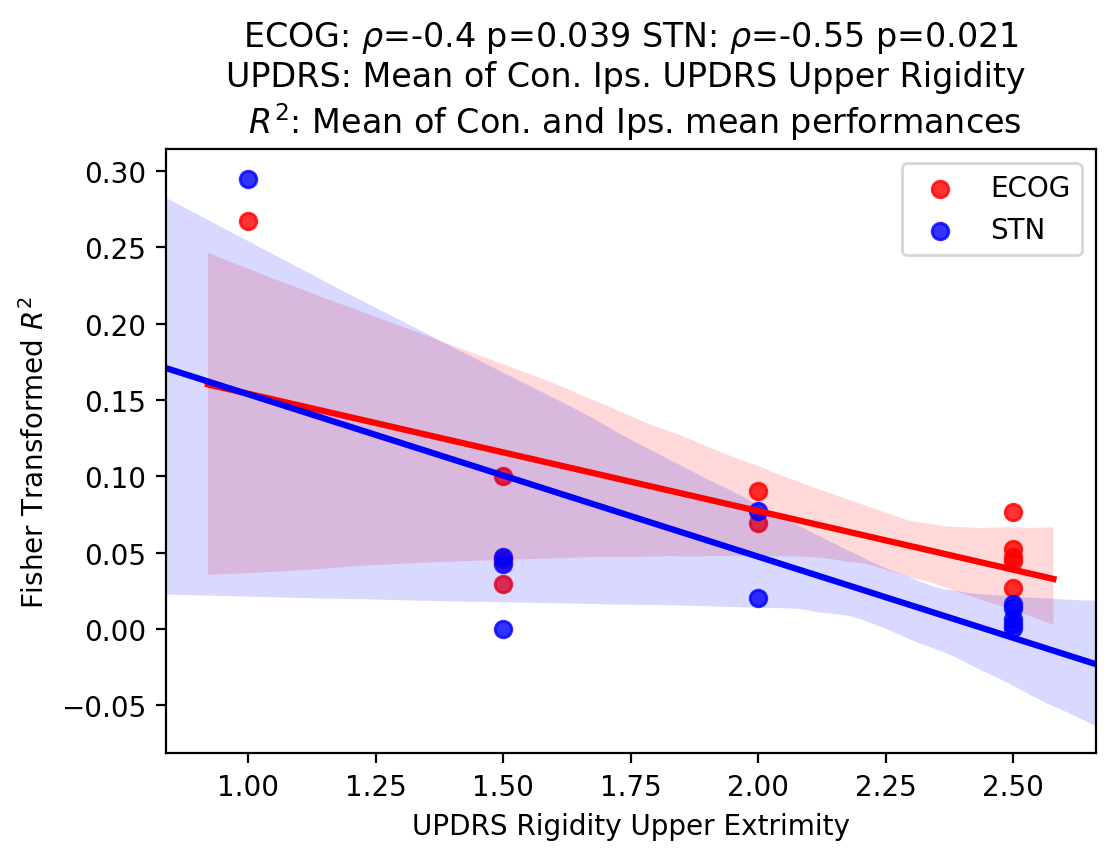

In [35]:
plt.figure(figsize=(6,4), dpi=200)
sns.regplot(x="pred", y="r2", data=df_comp_ECOG, color="red", label="ECOG")
sns.regplot(x="pred", y="r2", data=df_comp_STN, color="blue", label="STN")
plt.legend()
plt.xlabel("UPDRS Rigidity Upper Extrimity")
plt.ylabel("Fisher Transformed " + r"$R^2$")
plt.title("ECOG: "r"$\rho$"+"=-0.4 p=0.039"+" STN: "r"$\rho$"+"=-0.55 p=0.021"\
          "\nUPDRS: Mean of Con. Ips. UPDRS Upper Rigidity \n "+\
          r"$R^2$"+": Mean of Con. and Ips. mean performances ")